In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, os
import seaborn as sns
import pickle

In [2]:
def new_plot(res, title):
    ts = np.mean(res['ts'])
    tf = np.mean(res['tf'])
    ws = np.mean(res['ws'])
    wf = np.mean(res['wf'])
    
    sppp = [tf, ts]
    spsp = [wf, ws]
    
    # width =0.3
    # plt.bar(['foo', 'bar'], data1, width=width)
    # plt.bar(['bar', 'baz'], data2, width=width)
    # plt.show()


    labels = ['Facts', 'Skills']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, spsp, width, label='SPSP')
    rects2 = ax.bar(x + width/2, sppp, width, label='SPPP')

    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax.set_ylabel('Proportion Correct')
    ax.set_ylabel('Post')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    ax.set_ylim([0, 1.2])

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()
    

In [4]:
# NEW ALGEBRA
# data = pickle.load(open("/Users/nrd1012/Projects/cmu/research/AL_Train/direct/latest-res.pkl", "rb" ))
# data = pickle.load(open("/Users/nrd1012/Projects/cmu/research/AL_Train/direct/latest-res.pkl", "rb" ))
# data = pickle.load(open("/Users/nrd1012/Projects/cmu/research/AL_Train/direct/latest-res.pkl", "rb" ))
# data = pickle.load(open("/Users/nrd1012/Projects/cmu/research/AL_Train/direct/no_when_res.pkl", "rb" ))

def pplot(data, title):
    SPPP = "SPPP_TYPE"
    SPSP = "SPSP_TYPE"

    F = "F_TYPE"
    S = "S_TYPE"
    SE = 'seen'
    US = 'unseen'
    C = 'correct'
    W = 'incorrect'

    all_res = { "ts": [], "tf": [], "ws": [], "wf": [] }
    seen_res = { "ts": [], "tf": [], "ws": [], "wf": [] }
    unseen_res = { "ts": [], "tf": [], "ws": [], "wf": [] }
    for name, a in data.items():
        knowledge_type = a['type']
        cond = a['cond']
        
        if knowledge_type == F:
            a = a['post'][F]
        elif knowledge_type == S:
            a = a['post'][S]
            
        sc = a[SE][C]
        sw = a[SE][W]
        uc = a[US][C]
        uw = a[US][W]
        
#         print(f'{sc}, {sw}, {uc}, {uw}')
        
        post_s = sc / (sc + sw)
        post_u = uc / (uc + uw)
        post_all = (sc + uc) / (sc + sw + uc + uw)
        
#         print(f'tot_seen: {sc+sw}')
#         print(f'tot_unseen: {uc+uw}')
        
        cat = f"{'t' if cond == SPPP else 'w'}{'f' if knowledge_type == F else 's'}"
        all_res[cat].append(post_all)
        seen_res[cat].append(post_s)
        unseen_res[cat].append(post_u)
        

    new_plot(all_res, f'{title} - All')
    new_plot(seen_res, f'{title} - Seen')
    new_plot(unseen_res, f'{title} - Unseen')
    
# pplot(data, 'Test')

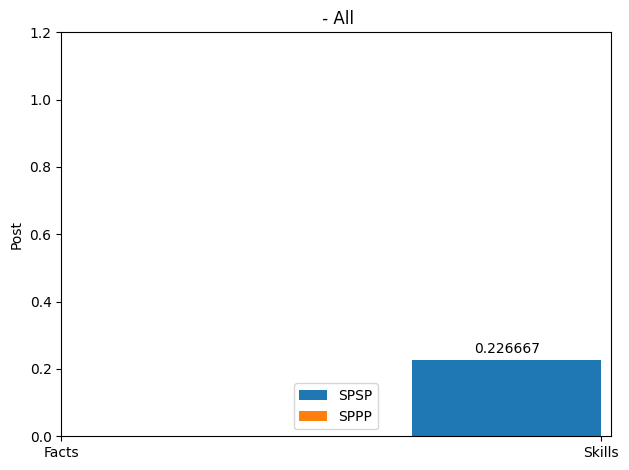

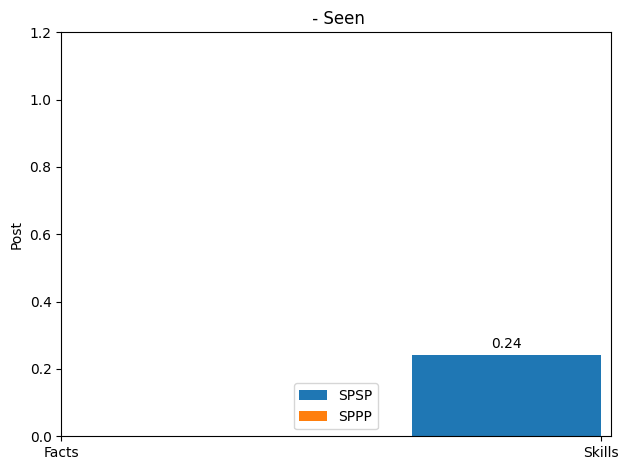

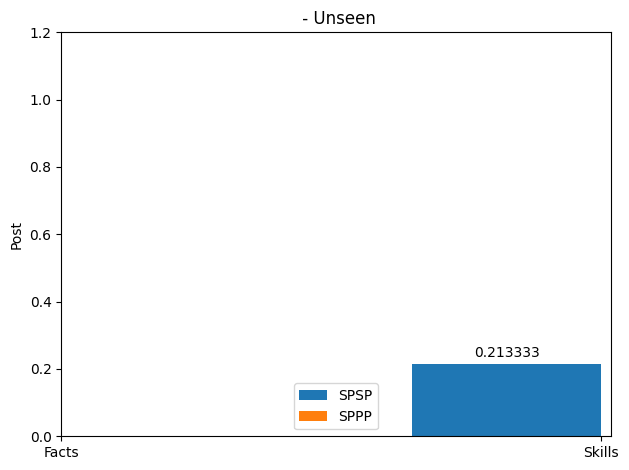

In [6]:
# dirname = "/Users/nrd1012/Projects/cmu/research/al-run/memory/results/logs-latest"
# dirname = "/Users/nrd1012/Projects/cmu/research/al-run/memory/experiments/step/logs"
# dirname = "/Users/nrd1012/Projects/cmu/research/al-run/memory/experiments/no-step/logs"
dirname = "/Volumes/NREXT/proj/research/al-run/logs"
files = [f for f in os.listdir(dirname) if f.endswith('.pkl')]
d = {}
for f in files:
    data = pickle.load(open(f"{dirname}/{f}", "rb" ))
    d.update(data)

pplot(d, '')
    
# data = pickle.load(open("/Users/nrd1012/Projects/cmu/research/AL_Train/direct/alg-no-mem.pkl", "rb" ))

In [12]:
d['SPSP-S-1']['results']

[[{'ttype': 'study', 'ktype': None, 'info': None, 'ltype': 'LOG_DEMO'}],
 [{'ttype': 'study', 'ktype': None, 'info': None, 'ltype': 'LOG_DEMO'}],
 [{'ttype': 'study', 'ktype': None, 'info': None, 'ltype': 'LOG_DEMO'}],
 [{'ttype': 'study', 'ktype': None, 'info': None, 'ltype': 'LOG_DEMO'}],
 [{'ttype': 'study', 'ktype': None, 'info': None, 'ltype': 'LOG_DEMO'}],
 [{'ttype': 'study',
   'ktype': 'S_TYPE',
   'info': {'problem_name': '1, args: [7, 3], ans: 343, S_TYPE, study, practice',
    'skill_id': 'SK_QjfOY7z8RhAwZ4SVoDPxtOKjDgZPaO'},
   'ltype': 'LOG_WRONG'}],
 [{'ttype': 'study',
   'ktype': 'S_TYPE',
   'info': {'problem_name': '2, args: [240, 5, 72, 24], ans: 16, S_TYPE, study, practice',
    'skill_id': 'SK_erdhDN6x67ge9GlRSgutwpqSo8L35F'},
   'ltype': 'LOG_WRONG'}],
 [{'ttype': 'study',
   'ktype': 'S_TYPE',
   'info': {'problem_name': '3, args: [256, 4, 4], ans: 16, S_TYPE, study, practice',
    'skill_id': 'SK_z7skjPiWwLiOAfMXsdAWLDwjgYr6dd'},
   'ltype': 'LOG_WRONG'}],
 [{'

In [ ]:
data = pickle.load(open("/Users/nrd1012/Projects/cmu/research/AL_Train/direct/alg-no-mem.pkl", "rb" ))
pplot(data, 'No Memory')

data = pickle.load(open("/Users/nrd1012/Projects/cmu/research/AL_Train/direct/alg-mem.pkl", "rb" ))
pplot(data, 'Memory')

### Learning Curve ###

In [ ]:
df = pd.read_csv("/Users/nrd1012/Projects/cmu/research/AL_Train/direct/latest-transaction_logs.csv", sep=',')

In [ ]:
df[(df.Knowledge=='Fact') & (df.Type!="posttest") & (df.Intermediate==False) & df.Agent.str.startswith('SPSP')]

In [64]:
# for agent in df.Agent.unique():
#     adf =  df[(df.Knowledge=='Fact') & (df.Type!="posttest") & (df.Intermediate==False) & df.Agent.str.startswith('SPSP')]
#     print(agent)
count = {}
def label_opp(row):
    if row.Intermediate:
        return None
    key = f'{row.Agent}-{row.Concept}'
    if key not in count:
        count[key] = 1
        return 1
    count[key] += 1
    return count[key]
    
df['Opp'] = df.apply(lambda row: label_opp(row), axis=1)

def get_score(row):
    if row.Result == "CORRECT":
        return 1
    if row.Result == "INCORRECT":
        return 0
    else:
        return -1

df['Score'] = df.apply(lambda row: get_score(row), axis=1)

In [ ]:
# Fact - Practice
fp = df[(df.Knowledge=='Fact') & (df.Type!="posttest") & (df.Intermediate==False) & df.Agent.str.startswith('SPPP')]

# Fact - Study
fs = df[(df.Knowledge=='Fact') & (df.Type!="posttest") & (df.Intermediate==False) & df.Agent.str.startswith('SPSP')]

# Skill - Practice
sp = df[(df.Knowledge=='Skill') & (df.Type!="posttest") & (df.Intermediate==False) & df.Agent.str.startswith('SPPP')]

# Skill - Study
ss = df[(df.Knowledge=='Skill') & (df.Type!="posttest") & (df.Intermediate==False) & df.Agent.str.startswith('SPSP')]


def plot_learning_curve(df):
    print(df.groupby(['Opp']).mean()['Score'])

print("FP")
plot_learning_curve(fp)
print("FS")
plot_learning_curve(fs)
print("SP")
plot_learning_curve(sp)
print("SS")
plot_learning_curve(ss)

In [68]:
df.to_csv("./opp_transactions.csv")